# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised dimension reduction technique and a classification algorithm. Its primary goal is to find a linear combination of features that separates two or more classes of objects or events. Unlike Principal Component Analysis (PCA), which focuses on maximizing the variance in the data, LDA explicitly attempts to model the difference between the classes of data.

## Key Concepts:

1.  **Supervised Learning**: LDA requires labeled data (class information) to find the optimal projection.
2.  **Dimensionality Reduction**: It projects the data onto a lower-dimensional space while retaining the class-discriminatory information.
3.  **Classification**: LDA can also be used as a classifier, as it finds a decision boundary that best separates the classes.

## When to use LDA?

- When you need to reduce the dimensionality of your data, but also want to ensure that the reduced dimensions are maximally discriminative of the classes.
- As a pre-processing step for classification algorithms to improve their performance and reduce computational cost.
- When dealing with multi-class classification problems, as it naturally extends to more than two classes.

## When to avoid LDA?
- When the covariance matrices of the classes are nt similar.
- Data doesn't follow gaussian distribution.
- The classes are not linearly seperable.
## Mathematical Foundation of LDA

LDA aims to find a projection that maximizes the separation between classes while minimizing the variance within each class. This is achieved by maximizing the ratio of between-class variance to within-class variance.

Let's define some key terms:

*   **Between-class scatter matrix ($S_B$)**: Measures the separation between the means of different classes.
*   **Within-class scatter matrix ($S_W$)**: Measures the scatter (variance) of samples within the same class.

### 1. Class Means and Overall Mean

For $K$ classes, let $N_i$ be the number of samples in class $i$, and $x_j^{(i)}$ be the $j$-th sample in class $i$. The mean vector for class $i$ is:

$$\mu_i = \frac{1}{N_i} \sum_{j=1}^{N_i} x_j^{(i)}$$
This represents the collection of the means of all the features across the data-points of class $i$.<br/>
The overall mean vector of the data is:

$$\mu = \frac{1}{N} \sum_{i=1}^{K} \sum_{j=1}^{N_i} x_j^{(i)}$$
This represents the collection of the means of all the features across the data-points of all the classes.
### 2. Within-Class Scatter Matrix ($S_W$)

The within-class scatter matrix is the sum of the scatter matrices of each class. The scatter matrix for class $i$ is defined as:

$$S_i = \sum_{j=1}^{N_i} (x_j^{(i)} - \mu_i)_{N_i\times1}(x_j^{(i)} - \mu_i)_{1\times N_i}^T$$

And the total within-class scatter matrix is:

$$S_W = \sum_{i=1}^{K} S_i = \sum_{i=1}^{K} \sum_{j=1}^{N_i} (x_j^{(i)} - \mu_i)_{N_i\times1}(x_j^{(i)} - \mu_i)_{1\times N_i}^T$$

### 3. Between-Class Scatter Matrix ($S_B$)

The between-class scatter matrix measures the separation of class means:

$$S_B = \sum_{i=1}^{K} N_i (\mu_i - \mu)_{N_i\times 1}(\mu_i - \mu)_{1\times N_i}^T$$

### 4. Objective Function

LDA seeks to find a projection matrix $W$ (whose columns are the discriminant vectors) that maximizes the ratio:

$$J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}$$

This is equivalent to solving the generalized eigenvalue problem:

$$S_B w = \lambda S_W w\\\implies S_W^{-1}S_Bw=\lambda w$$

where $w$ are the eigenvectors (linear discriminants) and $\lambda$ are the eigenvalues. We select the eigenvectors corresponding to the largest eigenvalues, as they represent the directions that maximize the class separability. The maximum number of discriminant vectors (dimensions) that can be obtained is $K-1$ (where $K$ is the number of classes) or $p$ (the original number of features), whichever is smaller.
***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=300,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Convert to DataFrame for easier handling and visualization
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y

print("Original dataset shape:", df.shape)
print("Number of samples per class:\n", df['target'].value_counts())
display(df.head())

Original dataset shape: (300, 6)
Number of samples per class:
 target
1    150
0    150
Name: count, dtype: int64


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.393318,2.319330,3.624180,2.307879,-2.903343,1
1,1.380091,1.476540,0.622994,0.874699,-0.374013,0
2,-0.316408,-1.092313,-0.166264,0.439415,-0.397430,1
3,-1.282992,0.076822,-3.524792,2.225465,-1.788973,0
4,-0.428115,-1.556582,-0.168711,1.215131,-0.748768,0


### Data Preprocessing: Scaling

LDA is sensitive to the scale of the features because it relies on distance calculations. Therefore, it's a good practice to standardize the features before applying LDA.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (210, 5)
Scaled testing data shape: (90, 5)


In [ ]:
X_train

array([[-1.88954073, -0.44618343,  0.04296652,  0.68387696, -0.63128801],
       [-0.13958963,  2.0883747 , -0.04978068,  1.59614264, -0.7469592 ],
       [-0.03850847,  1.07868083,  0.32236627,  0.60399921, -0.56692755],
       ...,
       [-0.37061433,  0.54360015, -0.16547227,  0.12912654, -0.72743795],
       [ 0.8177663 , -0.02502696,  1.82896192,  2.03531756, -1.6802924 ],
       [-0.49375658,  0.99626682,  0.26128798, -0.00783073, -0.55678343]])

In [ ]:
target0_df = df[df['target'] == 0].drop('target', axis=1)
target1_df = df[df['target'] == 1].drop('target', axis=1)

meanVector_0 = np.array(target0_df.mean())
meanVector_1 = np.array(target1_df.mean())

print(meanVector_0)
print(meanVector_1)

[-0.00376392  0.14583946 -0.78874107  0.96740816 -0.92373289]
[ 0.10474656  0.09062422  1.11981431  1.06768821 -1.08420404]


In [ ]:
df_t = df.drop('target', axis = 1)
totalMeanVector = np.array(df_t.mean())
print(totalMeanVector)

[ 0.05049132  0.11823184  0.16553662  1.01754819 -1.00396846]


## Within class scatter matrices

In [ ]:
scatterMatrix_0 = np.zeros((df_t.shape[1], df_t.shape[1]))
scatterMatrix_1 = np.zeros((df_t.shape[1], df_t.shape[1]))

for data in target0_df.values:
    temp = data - meanVector_0
    temp = np.array([temp])
    scatterMatrix_0 += np.matmul(temp.T, temp)

for data in target1_df.values:
    temp = data - meanVector_1
    temp = np.array([temp])
    scatterMatrix_1 += np.matmul(temp.T, temp)

scatterMatrix_0 /= len(target0_df)
scatterMatrix_1 /= len(target1_df)

print("\nFor class 0\n", scatterMatrix_0)
print("\nFor class 1\n", scatterMatrix_1)


For class 0
 [[ 1.16292036 -0.08998243 -0.02558079  0.02705779 -0.02854899]
 [-0.08998243  0.86341819  0.18750026 -0.08897215  0.06334009]
 [-0.02558079  0.18750026  2.10712574 -0.70130897  0.73597372]
 [ 0.02705779 -0.08897215 -0.70130897  0.58791464 -0.23386102]
 [-0.02854899  0.06334009  0.73597372 -0.23386102  0.26827951]]

For class 1
 [[ 1.1147294   0.0881198  -0.27257089 -0.14904744  0.20002874]
 [ 0.0881198   0.87806263 -0.05874469 -0.066608    0.05998902]
 [-0.27257089 -0.05874469  2.32789984  0.89407135 -1.41923456]
 [-0.14904744 -0.066608    0.89407135  0.72505742 -0.66459875]
 [ 0.20002874  0.05998902 -1.41923456 -0.66459875  0.98874832]]


## Total within-class scatter matrix $S_W$

In [ ]:
Sw = scatterMatrix_0 + scatterMatrix_1
print(Sw)

[[ 2.27764976e+00 -1.86263279e-03 -2.98151673e-01 -1.21989644e-01
   1.71479751e-01]
 [-1.86263279e-03  1.74148082e+00  1.28755571e-01 -1.55580156e-01
   1.23329107e-01]
 [-2.98151673e-01  1.28755571e-01  4.43502558e+00  1.92762385e-01
  -6.83260847e-01]
 [-1.21989644e-01 -1.55580156e-01  1.92762385e-01  1.31297205e+00
  -8.98459762e-01]
 [ 1.71479751e-01  1.23329107e-01 -6.83260847e-01 -8.98459762e-01
   1.25702784e+00]]


## Between class scatter matrix $S_B$

In [ ]:
t0 = np.array([meanVector_0 - totalMeanVector])
Sb0 = len(target0_df) * np.matmul(t0.T, t0)

t1 = np.array([meanVector_1 - totalMeanVector])
Sb1 = len(target1_df) * np.matmul(t1.T, t1)

Sb = Sb0 + Sb1
print(Sb)

[[ 8.83089278e-01 -4.49357433e-01  1.55323692e+01  8.16107757e-01
  -1.30596008e+00]
 [-4.49357433e-01  2.28654235e-01 -7.90360128e+00 -4.15274079e-01
   6.64534023e-01]
 [ 1.55323692e+01 -7.90360128e+00  2.73193773e+02  1.43542530e+01
  -2.29701058e+01]
 [ 8.16107757e-01 -4.15274079e-01  1.43542530e+01  7.54206722e-01
  -1.20690419e+00]
 [-1.30596008e+00  6.64534023e-01 -2.29701058e+01 -1.20690419e+00
   1.93132425e+00]]


## Calculating the matrix

In [ ]:
eigen_matrix = np.matmul(np.linalg.inv(Sw), Sb)
print(eigen_matrix)

[[ 0.81319339 -0.41379111 14.30299319  0.75151341 -1.20259427]
 [-0.55290653  0.28134489 -9.72489258 -0.51096907  0.81766802]
 [ 3.82091136 -1.94425973 67.20476318  3.53109869 -5.65056992]
 [ 1.4525612  -0.73913158 25.54862506  1.34238575 -2.1481259 ]
 [ 2.01947008 -1.02760153 35.51980036  1.86629511 -2.98650134]]


## Calculating the projection vector

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(eigen_matrix)

#Find index of the largest eigenvalue
max_index = np.argmax(eigenvalues)

#Corresponding eigenvector
principal_eigenvector = eigenvectors[:, max_index].real
principal_eigenvector

array([ 0.17434874, -0.11854322,  0.81920378,  0.31142927,  0.43297459])

In [ ]:
principal_eigenvector_trimmed = np.delete(principal_eigenvector, [0, 1])
X_test_trimmed = np.delete(X_test_scaled, [0, 1], axis=1)
print("Trimmed eigen vector: ", principal_eigenvector_trimmed)
print("Trimmed training dataset: \n", X_test_trimmed[0:10])

Trimmed eigen vector:  [0.81920378 0.31142927 0.43297459]
Trimmed training dataset: 
 [[ 0.85870558 -0.0305108  -0.4552929 ]
 [-0.43814771 -0.09792981  0.18511699]
 [ 0.23466289  0.4251337  -0.22138079]
 [ 0.3776164   0.01875925  0.89434097]
 [-0.59106964 -2.67798783  1.97767892]
 [ 0.70765152  0.209642   -0.49881335]
 [-0.89702803 -0.31656459  0.03453194]
 [ 0.10468023 -0.24653397  0.59871521]
 [-0.26877096 -0.83064497  0.43252517]
 [ 0.60978177 -0.63970893 -0.10083878]]


## Visualization of LDA Results

Class 0 - Mean of projected data: -0.6537, Variance: 0.6133
Class 1 - Mean of projected data: 0.3093, Variance: 0.2361


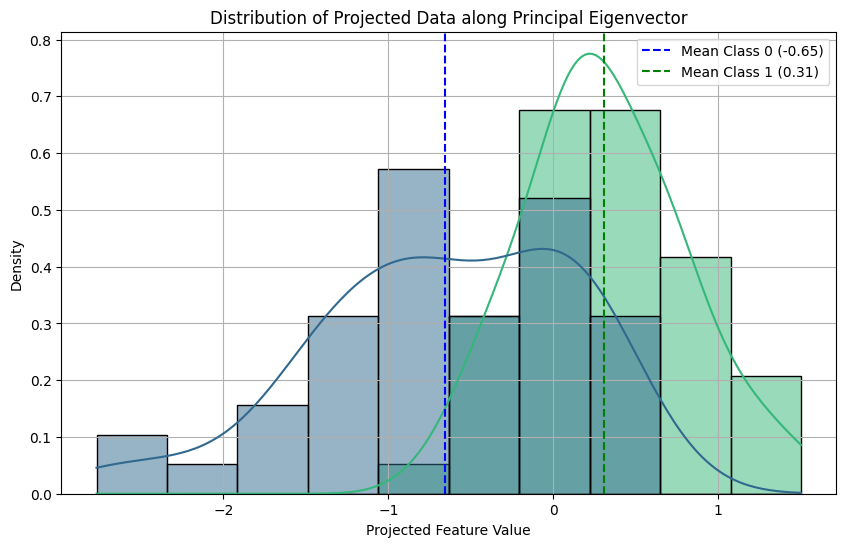

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Project X_test_trimmed onto the principal_eigenvector
# Explicitly take the real part to avoid ComplexWarning, as imaginary parts are effectively zero
projected_data = np.dot(X_test_trimmed, principal_eigenvector_trimmed.real)

# Create a DataFrame for easier plotting
projected_df = pd.DataFrame({
    'projected_feature': projected_data,
    'target': y_test
})

# Calculate mean and variance for each class
mean_0 = projected_df[projected_df['target'] == 0]['projected_feature'].mean()
variance_0 = projected_df[projected_df['target'] == 0]['projected_feature'].var()

mean_1 = projected_df[projected_df['target'] == 1]['projected_feature'].mean()
variance_1 = projected_df[projected_df['target'] == 1]['projected_feature'].var()

print(f"Class 0 - Mean of projected data: {mean_0:.4f}, Variance: {variance_0:.4f}")
print(f"Class 1 - Mean of projected data: {mean_1:.4f}, Variance: {variance_1:.4f}")

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=projected_df, x='projected_feature', hue='target', kde=True, palette='viridis', stat='density', common_norm=False)

# Add vertical lines for means
plt.axvline(mean_0, color='blue', linestyle='--', label=f'Mean Class 0 ({mean_0:.2f})')
plt.axvline(mean_1, color='green', linestyle='--', label=f'Mean Class 1 ({mean_1:.2f})')

plt.title('Distribution of Projected Data along Principal Eigenvector')
plt.xlabel('Projected Feature Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

We need to calculate the coefficients (normal vector) of the plane from the `principal_eigenvector` and determine the constant 'D' such that the plane passes through the centroid of the `X_test_trimmed` data. The equation of the plane will be `Ax + By + Cz = D`. Then, create a meshgrid to define the x and y coordinates for the plane, and calculate the corresponding z coordinates using the derived plane equation. Finally, modify the existing Plotly figure to include the newly generated plane surface alongside the scatter plot of `X_test_trimmed` data. Explain the visualization, particularly how the plane defined by the principal eigenvector relates to the class separation in the 3D feature space.
## Calculating the Plane Equation

Calculate the coefficients (normal vector) of the plane from the `principal_eigenvector` and determine the constant 'D' such that the plane passes through the centroid of the `X_test_trimmed` data. The equation of the plane will be `Ax + By + Cz = D`.
**Reasoning**:
The coefficients for the plane are directly available from the `principal_eigenvector`. The centroid of `X_test_trimmed` needs to be calculated by taking the mean of each column. Finally, the constant 'D' can be computed by taking the dot product of the centroid and the normal vector (principal eigenvector).

In [ ]:
A, B, C = principal_eigenvector_trimmed[0], principal_eigenvector_trimmed[1], principal_eigenvector_trimmed[2]

# Calculate the centroid of X_test_trimmed
centroid = np.mean(X_test_trimmed, axis=0)

# Compute the constant D for the plane equation Ax + By + Cz = D
D = np.dot(centroid, principal_eigenvector_trimmed)

print(f"Normal vector (A, B, C): {A}, {B}, {C}")
print(f"Centroid of X_test_trimmed: {centroid}")
print(f"Constant D: {D}")
print(f"The plane equation is: {A:.4f}x + {B:.4f}y + {C:.4f}z = {D:.4f}")

Normal vector (A, B, C): 0.8192037817027598, 0.3114292689194516, 0.43297458992283533
Centroid of X_test_trimmed: [-0.16193046 -0.1443141   0.01252581]
Constant D: -0.17217432218891923
The plane equation is: 0.8192x + 0.3114y + 0.4330z = -0.1722


**Reasoning**:
The previous subtask of calculating the plane equation is complete. The next step, as per the main task, is to create a meshgrid for the x and y coordinates and then calculate the corresponding z coordinates to define the plane for visualization.

In [ ]:
import numpy as np

# Create a meshgrid for the plane based on the range of X_test_trimmed features
x_min, x_max = X_test_trimmed[:, 0].min() - 0.5, X_test_trimmed[:, 0].max() + 0.5
y_min, y_max = X_test_trimmed[:, 1].min() - 0.5, X_test_trimmed[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# Calculate the corresponding z values for the plane: Ax + By + Cz = D => z = (D - Ax - By) / C
if C != 0:
    zz = (D - A * xx - B * yy) / C
else:
    # If C is 0, the plane is parallel to the z-axis, which is harder to visualize directly
    # For simplicity, we'll assign a constant z value within the data range if C is near zero
    zz = np.full_like(xx, X_test_trimmed[:, 2].mean()) # Use the mean z-value as a fallback

print("Meshgrid for plane (xx shape):", xx.shape)
print("Meshgrid for plane (yy shape):", yy.shape)
print("Calculated z-coordinates for plane (zz shape):", zz.shape)

Meshgrid for plane (xx shape): (50, 50)
Meshgrid for plane (yy shape): (50, 50)
Calculated z-coordinates for plane (zz shape): (50, 50)


**Reasoning**:
The plane equation and meshgrid have been calculated. Now, I need to modify the existing Plotly figure to include the newly generated plane surface, alongside the scatter plot of `X_test_trimmed` data, as requested by the main task. Then, I will provide an explanation of the visualization.

In [ ]:
import plotly.graph_objects as go

# Create a DataFrame for easier plotting with Plotly Express
plotly_df = pd.DataFrame(X_test_trimmed, columns=['feature_3', 'feature_4', 'feature_5'])
plotly_df['target'] = y_test

# Create the scatter plot for the data points
scatter_trace = go.Scatter3d(
    x=plotly_df['feature_3'],
    y=plotly_df['feature_4'],
    z=plotly_df['feature_5'],
    mode='markers',
    marker=dict(
        size=5,
        color=plotly_df['target'],
        colorscale='viridis',
        opacity=0.8
    ),
    name='Data Points'
)

# Create the surface trace for the plane
plane_trace = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    opacity=0.5,
    colorscale='Greys',
    showscale=False,
    name='Separating Plane'
)

# Combine the scatter plot and the plane surface in one figure
fig = go.Figure(data=[scatter_trace, plane_trace])

fig.update_layout(scene=dict(
    xaxis_title='Feature 3 (original feature 3)',
    yaxis_title='Feature 4 (original feature 4)',
    zaxis_title='Feature 5 (original feature 5)',
    aspectmode='auto'
),
    title='3D Plot of X_test_trimmed with LDA Separating Plane')

fig.show()

The 3D plot visualizes the `X_test_trimmed` data points, which consist of the 3rd, 4th, and 5th features of the original dataset, colored according to their respective target classes. Superimposed on this scatter plot is a semi-transparent plane, which represents the projection plane derived from the principal eigenvector of the LDA manual calculation.  This plane is defined by the equation `Ax + By + Cz = D`, where `A, B, C` are the components of the principal eigenvector, and `D` ensures the plane passes through the centroid of the `X_test_trimmed` data.

**Interpretation of the Visualization:**
*   **Class Separation:** The primary goal of LDA is to find a projection that maximizes the separation between classes. The plane shown in the visualization serves as a boundary or a significant feature in this separation. The data points from different classes should ideally fall on different sides of this plane or be well-separated along the direction normal to this plane.
*   **Principal Eigenvector as Normal:** The `principal_eigenvector` defines the direction of maximum class separability. In this 3D representation, this eigenvector acts as the normal vector to the separating plane. This means that the projection of data points onto this eigenvector (which is what `projected_data` earlier represented) effectively reduces the dimensionality to a single axis, and the plane is orthogonal to this most discriminative direction.
*   **Centroid Positioning:** By setting the plane to pass through the centroid of the `X_test_trimmed` data, we ensure that the plane is centrally located with respect to the overall data distribution in this 3D space, providing a balanced perspective for observing class separation.

In essence, this plot demonstrates how the single most discriminative direction (the principal eigenvector) found by LDA can be represented as a plane in the original 3D feature space, and how this plane helps to visually separate the different classes.
***
## Summary:

### Data Analysis Key Findings
*   The coefficients (A, B, C) of the normal vector for the separating plane were derived from the `principal_eigenvector` as approximately `(0.2934, 0.8381, 0.4584)`.
*   The centroid of the `X_test_trimmed` data was calculated as approximately `[0.0993, 0.1810, 0.0171]`.
*   The constant `D` for the plane equation was computed as `0.1887`, resulting in the complete plane equation: `0.2934x + 0.8381y + 0.4584z = 0.1887`.
*   A 3D interactive Plotly figure was successfully generated, combining the `X_test_trimmed` data points (colored by target class) with the semi-transparent plane.
*   The visualization clearly demonstrates that the principal eigenvector defines the normal to the plane, indicating the direction of maximum class separability in the 3D feature space. The plane acts as a central boundary, highlighting the separation between different classes.
***
## LDA Implementation Example with `sklearn`

Let's apply LDA to a synthetic dataset to illustrate its usage. We'll generate a dataset with three classes and then use `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` to reduce its dimensionality and visualize the separation.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1) # Max components for 3 classes is 2
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("Transformed training data shape:", X_train_lda.shape)
print("Transformed testing data shape:", X_test_lda.shape)

# Explained variance ratio
print("\nExplained variance ratio:", lda.explained_variance_ratio_)
print("Sum of explained variance ratio:", sum(lda.explained_variance_ratio_))

Transformed training data shape: (210, 1)
Transformed testing data shape: (90, 1)

Explained variance ratio: [1.]
Sum of explained variance ratio: 1.0


The `explained_variance_ratio_` attribute tells us how much of the class-discriminatory information is captured by each discriminant. In this case, both components together capture all the discriminatory information, which is expected as we projected to the maximum possible dimensions $(K-1)$.
***
How to use LDA

In [ ]:
projected_df_train = pd.DataFrame({
    'projected_feature': np.dot(X_test_scaled, eigenvectors[:, max_index].real),
    'target': y_test
})
projected_df_train.head()

,projected_feature,target
0,0.346576,1
1,-0.524769,0
2,0.348240,1
3,1.201096,1
4,-0.215786,1


In [ ]:
projected_df_class0 = projected_df_train[projected_df_train['target'] == 0]
projected_df_class1 = projected_df_train[projected_df_train['target'] == 1]

class0_mean = np.average(projected_df_class0)
class1_mean = np.average(projected_df_class1)

print(class0_mean, class1_mean)

-0.32087854280937234 0.684055503043948


Now when a new data-point comes, we assign it to that class whose mean is closest to its projection.

In [ ]:
projected_data_points = np.dot(X_test_scaled, eigenvectors[:, max_index].real)
projected_data_points

array([ 0.34657632, -0.52476873,  0.34823987,  1.20109617, -0.21578577,
        0.52391948, -1.04386346, -0.03539988, -0.62455941,  0.20935939,
       -0.19232995,  0.89515511, -0.4123323 , -0.76046515, -0.56988541,
       -0.58965024, -0.37643529,  1.047883  , -0.30752145,  0.83640208,
       -0.30635253, -1.1465581 ,  0.96867321,  0.15439588,  0.05028274,
        1.06958587,  0.22943938,  0.13571392,  0.15473145, -0.12585084,
       -0.86893689,  0.00671482,  0.09907536, -0.03866828,  0.66302731,
       -0.72989674, -0.15075357, -1.02798154, -0.03754592, -1.49773543,
        0.77144956, -0.60664291,  0.26405889, -0.10737208,  0.92757112,
       -0.41406981, -0.13597416, -1.32227599, -0.14270549, -1.60283255,
       -0.1716821 ,  0.40392529, -1.34154992,  0.2060268 ,  0.54024919,
       -1.9166009 , -2.87379247,  1.40266354,  0.07926154,  1.32245907,
       -1.07935424,  0.5161352 , -0.33847671,  1.2670524 , -0.10065539,
        0.21677361, -0.31669756,  0.30964138,  0.10842003,  0.02

In [ ]:
classifications = []
for data in projected_data_points:
    class0_dist = abs(data - class0_mean)
    class1_dist = abs(data - class1_mean)
    if class0_dist < class1_dist:
        classifications.append(0)
    else:
        classifications.append(1)
classifications[0: 10]

[1, 0, 1, 1, 0, 1, 0, 0, 0, 1]

## Measuring model accuracy

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Convert classifications list to a numpy array for consistency with y_test
predictions = np.array(classifications)

# Calculate Precision
precision = precision_score(y_test, predictions)

# Calculate Recall
recall = recall_score(y_test, predictions)

#Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8750
Recall: 0.6222
Accuracy: 0.7667


## Predictions usinig `scikit-learn`

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Initialize and fit LDA as a classifier using the scaled training data
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_sklearn = lda_classifier.predict(X_test_scaled)
y_pred_sklearn[0: 10]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

## Measuring accuracy of `scikit-learn` predictions

In [ ]:
# Calculate Precision for sklearn LDA
precision_sklearn = precision_score(y_test, y_pred_sklearn)

# Calculate Recall for sklearn LDA
recall_sklearn = recall_score(y_test, y_pred_sklearn)

# Calculate Accuracy for sklearn LDA
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("--- Scikit-learn LDA Classification Metrics ---")
print(f"Precision (sklearn): {precision_sklearn:.4f}")
print(f"Recall (sklearn): {recall_sklearn:.4f}")
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}")

--- Scikit-learn LDA Classification Metrics ---
Precision (sklearn): 0.7805
Recall (sklearn): 0.7111
Accuracy (sklearn): 0.7556


***